In [1]:
# Downloading the Data - utilize 'urlretrieve' function from 'urllib.request'

medical_charges_url = 'https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv'
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x1986b1d3d90>)

In [2]:
# Create a Pandas dataframe using the downloaded file, to view and analyze data.

import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
# Check to DF to ensure it was installed

medical_df.info()
print(medical_df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max     

In [4]:
# Exploratory Analysis and Visualization
# Install plotlty, matplotlib, and seaborn. Then import them into the the script

import plotly.express as px # High-level api
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# improvising the default style and the fonts in our charts
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [6]:
## Age
# Visulaize the distribution of age using a histogram with 47 bins (one for each year) and a box plot.
# Utilize plotly to make the chart interactive (Note: similar charts could be used with Seaborn)

medical_df.age.describe()

fig = px.histogram(medical_df,
                   x='age',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Age')
fig.update_layout(bargap=0.1)
fig.show()

In [7]:
## Body mass index
# Look at the distribution of BMI of customers, using a histogram and a box plot.

fig = px.histogram(medical_df,
                   x='bmi',
                   marginal='box',
                   color_discrete_sequence=['red'],
                   title='Distribution of Body Mass Index (BMI)')
fig.update_layout(bargap=0.1)
fig.show()

# You will see a Guassian distribution (Normal distribution)

In [8]:
## Charges
# Let's visualize the annual medical charges of customers. This is the column of where we try to predict.
# Let's use the categorical column "smoker" to distinguish the charges for smokers and non-smokers.

fig = px.histogram(medical_df,
                   x='charges',
                   color='smoker',  # This pulls another column and make it a different color.
                   color_discrete_sequence=['grey', 'green'],
                   marginal='box',
                   title="Annual Medical Charges")
fig.update_layout(bargap=.01)
fig.show()

# What you will see is that smokers on median, will have a higher annual insurance fees.
# We see an exponetial decrease in the count of amount of people who smoke. 

In [9]:
## Exercise: Visualize the distribution of medical charges in connection with the factors like "sex" and "region". What do you observe?

fig = px.histogram(medical_df,
                   x='sex',
                   color='region',
                   color_discrete_sequence=['green','blue', 'red', 'orange'],
                   title='Distribution between Sex and Region')
fig.update_layout(bargap=.1,
                  xaxis_title_font_textcase='upper',
                  yaxis_title_font_textcase='upper')
fig.show()

# We can see that there i

In [10]:
## Smoker
# Visualize the distribution of "smoker" column (containing values "yes" and "no") using a histogram

px.histogram(medical_df,
             x='smoker',
             color='sex',
             title='Smokers between sex')

# Visually, people who smoke seems to be more Men.

In [11]:
## Age and Charges
# Visualize the relationships between "age" and "charges" using a scatter plot.
# Each point in th escatter plot represents one customer.
# Use the values "smoker" column to color the points.

fig = px.scatter(medical_df,
                 x='age',
                 y='charges',
                 color='smoker',
                 opacity=0.8,  # Opacity level between on the points.
                 hover_data=['sex'],  # When interacting with the plot - this will allow us to see the sex vairable from the data.
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [12]:
## BMI vs. Charges

fig = px.scatter(medical_df,
                 x='bmi',
                 y='charges',
                 opacity=.8,
                 color='smoker',
                 hover_data=['sex'],
                 title='BMI vs. Charges between Sex')
fig.update_layout(xaxis_title_font_textcase='upper',
                 yaxis_title_font_textcase='upper')
fig.update_traces(marker_size=5)
fig.show()

In [13]:
fig = px.violin(medical_df,
                x='children',
                y='charges',
                title='Sex VS. Charges on Violin Plot ')
fig.update_layout(xaxis_title_font_textcase='upper',
                  yaxis_title_font_textcase='upper')
fig.show()

In [14]:
## Correlation Coefficient - The relationship between two variables and their data sets (Correlation is not Causation)

medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [15]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

In [16]:
# Compute the correlation of categorical columns, they must first be converted into numeric columns. Let's turn smokers into numerics prior to finding the correlation

smoker_values = {'no':0, 'yes':1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

In [17]:
sex_values = {'female':0, 'male':1}
smoker_values = {'no':0, 'yes':1}

sex_numerics = medical_df.sex.map(sex_values)
smoker_numerics = medical_df.smoker.map(smoker_values)
smoker_numerics.corr(sex_numerics)

np.float64(0.07618481692109505)

In [18]:
region_values = {'northwest':1, 'northeast':2,'southwest':3, 'southeast':4}

region_numerics = medical_df.region.map(region_values)  # We also needed to turn regions into a numeric
medical_df.corr(numeric_only=True)  # To correlate all; we need to ensure numeric is all True.

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


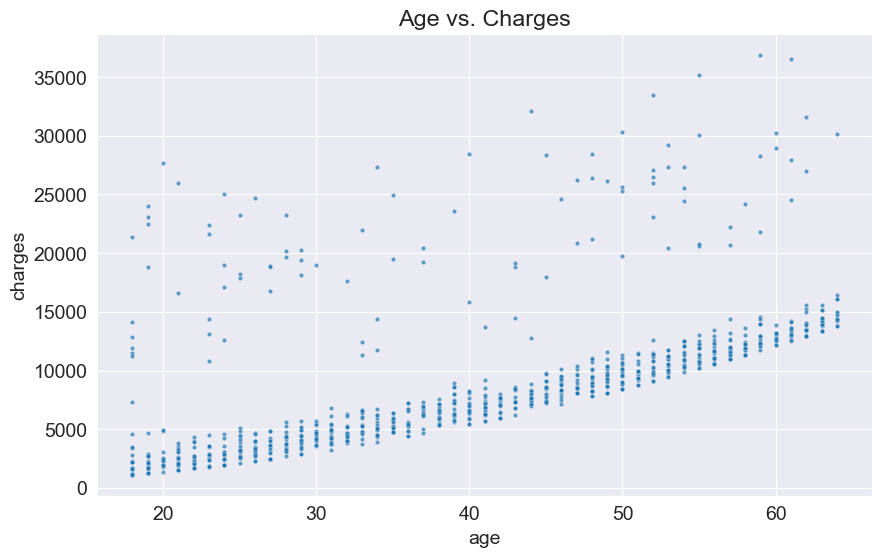

In [19]:
## Linear Regression with a Single Feature
# Smoker and Age colums have the strongest correlation with Charges.
# Find a way to extemate the value of Charges using the value of Age for non-smokers.
# Let's create a data frame containing just the data for non-smokers.

non_smoker_df = medical_df[medical_df.smoker == "no"]

plt.title('Age vs. Charges')
fig = sns.scatterplot(data=non_smoker_df,
                x='age',
                y='charges',
                alpha=0.7,
                s=10)

In [20]:
def est_charges(age, w, b):
    return w * age + b

In [21]:
w = 50
b = 100

In [22]:
est_charges(30,w,b)

1600

In [23]:
est_charges(40, w, b)

2100

In [24]:
ages = non_smoker_df.age
ages

1       18
2       28
3       33
4       32
5       31
        ..
1332    52
1333    50
1334    18
1335    18
1336    21
Name: age, Length: 1064, dtype: int64

In [25]:
estimated_charges = est_charges(ages, w, b)
estimated_charges

1       1000
2       1500
3       1750
4       1700
5       1650
        ... 
1332    2700
1333    2600
1334    1000
1335    1000
1336    1150
Name: age, Length: 1064, dtype: int64

In [26]:
non_smoker_df.charges

1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
5        3756.62160
           ...     
1332    11411.68500
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
Name: charges, Length: 1064, dtype: float64

Text(0, 0.5, 'Estimated Charges')

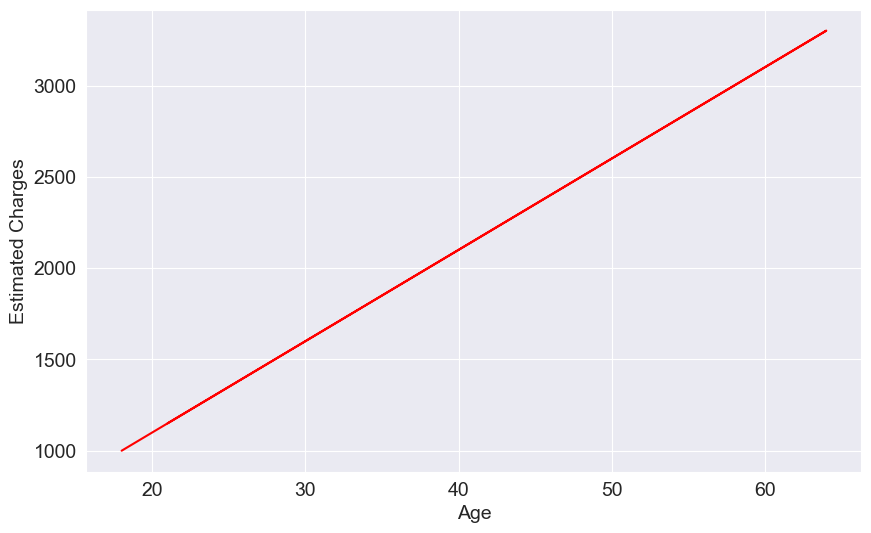

In [27]:
plt.plot(ages, estimated_charges, 'r')
plt.xlabel('Age')
plt.ylabel('Estimated Charges')

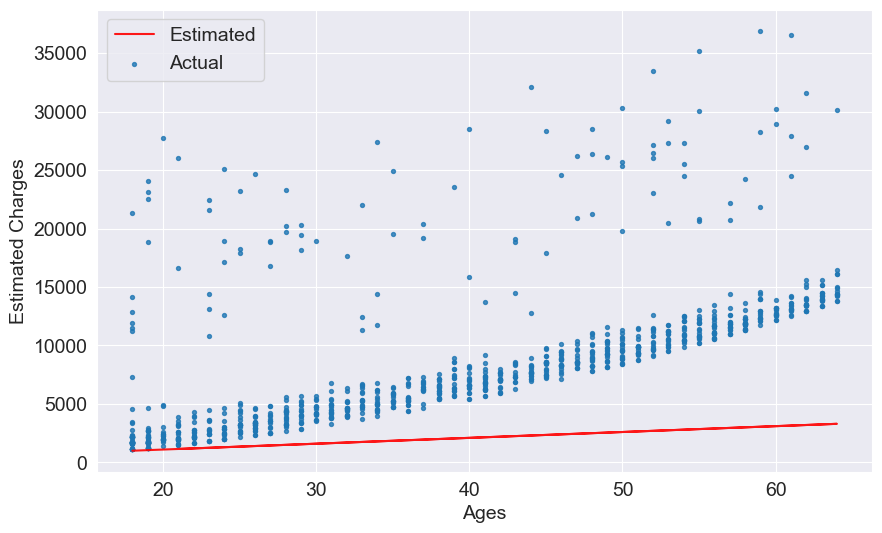

In [28]:
target = non_smoker_df.charges  # What we want to find

plt.plot(ages, estimated_charges, 'r', alpha=0.9)

plt.scatter(ages, target, s=8, alpha=0.8)
plt.xlabel('Ages')
plt.ylabel('Estimated Charges')
plt.legend(['Estimated', 'Actual'])

In [29]:
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges

    estimated_charges = est_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9)
    plt.scatter(ages, target, s=8, alpha=0.9)
    plt.xlabel('Ages')
    plt.ylabel('Estimated Charges')
    plt.legend(['Estimate', 'Actual'])

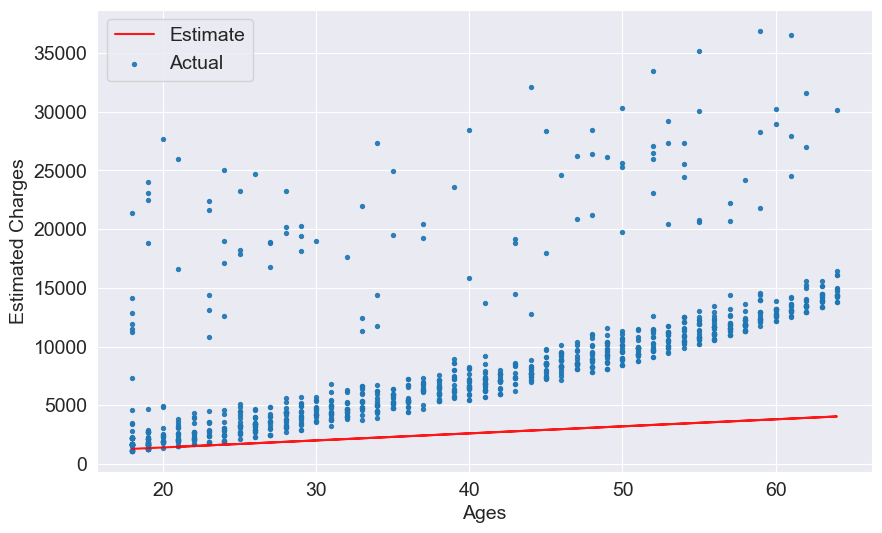

In [30]:
try_parameters(60, 200)

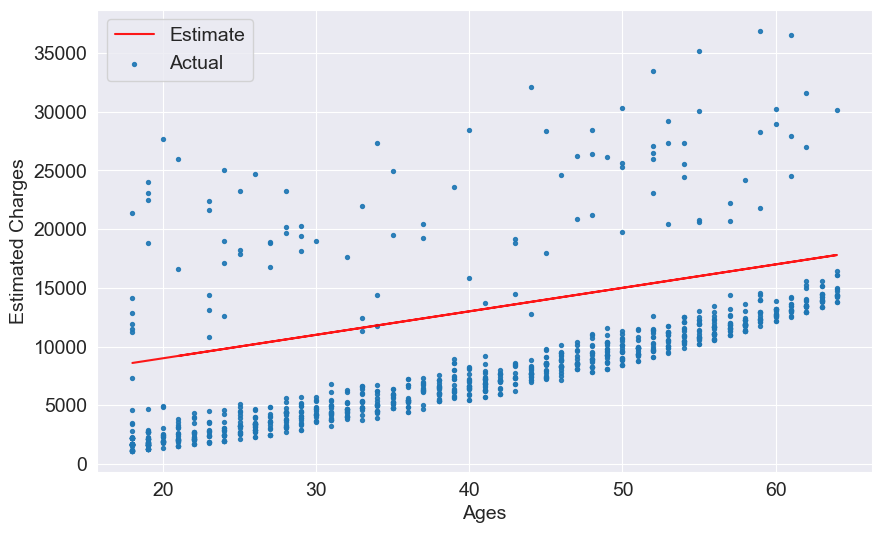

In [31]:
try_parameters(200, 5000)

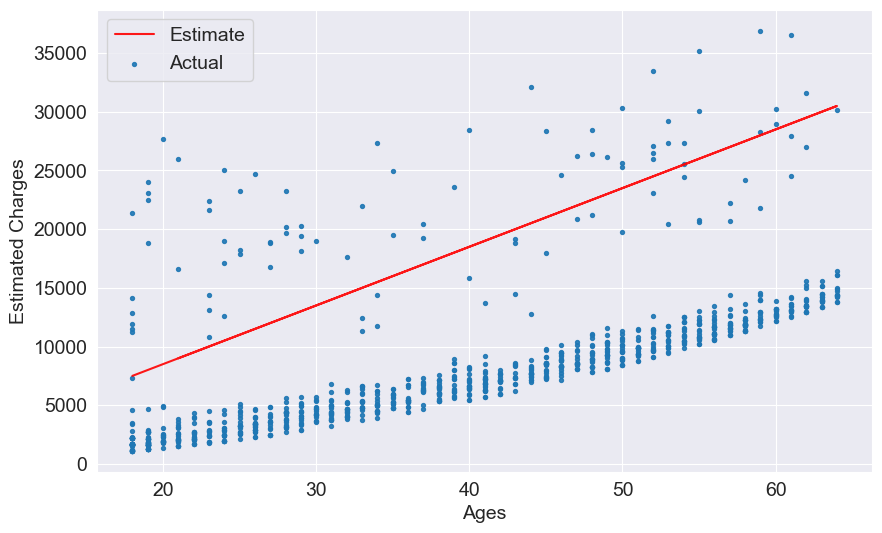

In [32]:
try_parameters(500,-1500)  # W (weight) controls the slope. B (bias) is the predisposition of x-value

In [33]:
# As we adjust the weight and the bias to, we can assume a general estimation of the best fit line for the scenario
# Wouldn't it be nicer to have a computer figures this out for you instead? How would we do this.

# 1. We need a way to measure numerically how well hte line fits the points. (since we have eyes, we can see the computer does not)
# 2. Once the measure of fit" has been computed, we need a way to modify w (weight) and b (bias) to improve the fit.

In [34]:
## Loss/Cost Function - Root Mean Squared Error
# We can compare teh models' predications with the acutal targets using the following method:
    # Calculate the differnce between the targets and predictions (the differeneced is called the "residual")
    # Square all elements of the difference matrix to remove negative values.
    # Calculate the average of the elements in the resulting matrix.
    # Take the square root of the result
# Root Means Squared Error (RMSE) - read the acronym backwards | Average on average how far away we are from the line.
    # Root - Square it again.
    # Means - Take the average.
    # Squared - We square them out sense difference could be positive/negatives (+/-) may cancel out. So we make them positive.
    # Error - The difference between the target (actual) data and the estimated

In [35]:
import numpy as np

In [36]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

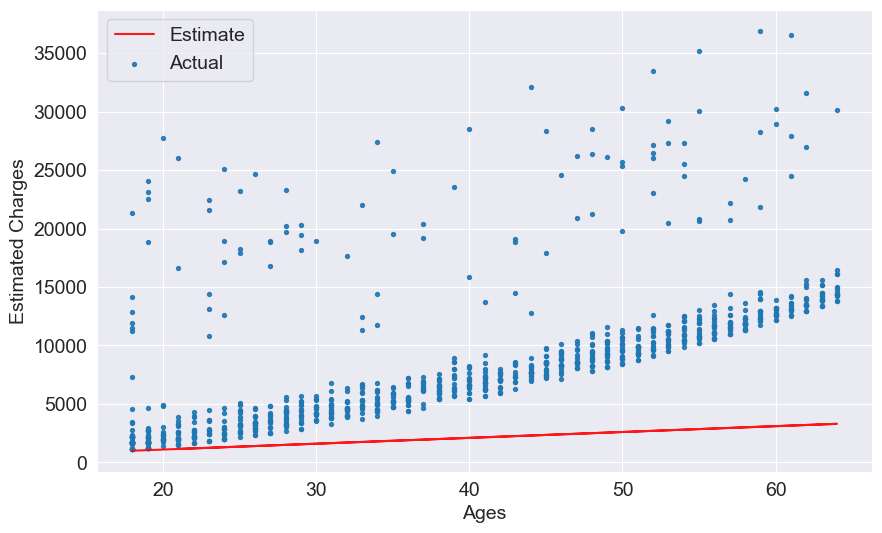

In [37]:
# Sample set of weights
w = 50
b = 100
try_parameters(w, b)

In [38]:
targeted = non_smoker_df['charges']
predicted = est_charges(non_smoker_df.age, w, b)

In [39]:
rmse(target, predicted)

np.float64(8461.949562575493)

In [40]:
# Re-define the try_parameter so we can see visually of the errors

def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    predict = est_charges(ages, w, b)

    plt.plot(ages, predict, 'r', alpha = 0.9);
    plt.scatter(ages, target, s=8, alpha=0.8 );
    plt.xlabel('Ages');
    plt.ylabel("Charges");
    plt.legend(['Predicted', 'Actual']);

    loss = rmse(target, predict)
    print(f"RMSE Loss: {loss}")

RMSE Loss: 8461.949562575493


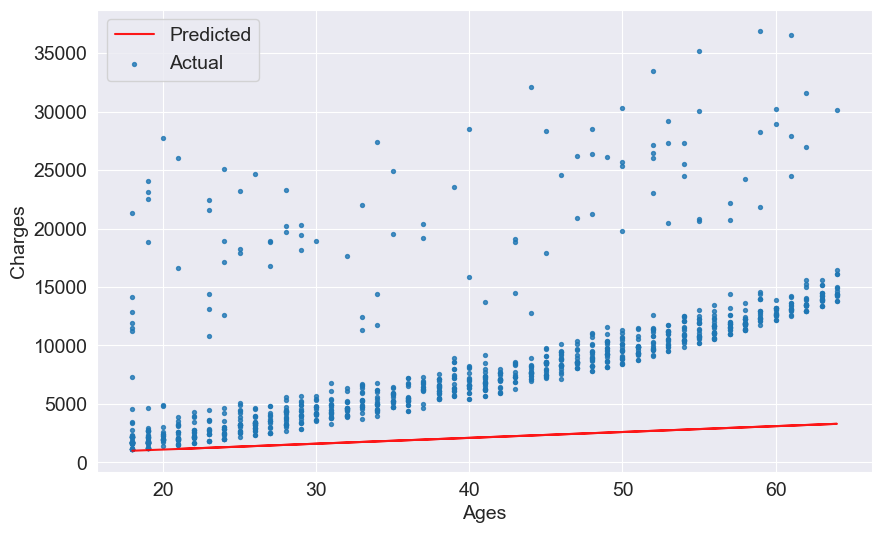

In [41]:
try_parameters(50, 100)

RMSE Loss: 4818.589201659388


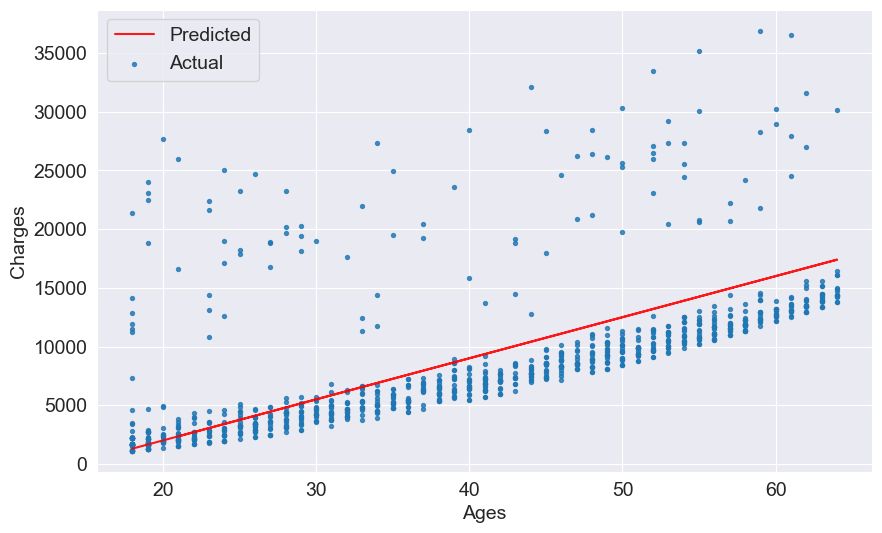

In [42]:
# Now that we can see the RMSE loss - the goal is to attempt to minimize the parameter to as low as possible.

try_parameters(350, -5000)

In [43]:
## Optimizer
# We now need a strategy to modify the weight and the bias. It needs to reduce the RMSE loss and improve the best 'fit' lind for the data.
# Here are two solutions:
    # Ordinary Least Square:  For smaller data - directly computes the best value for w and b using matrix operations
    # Stochastic gradient descent:  For larger data - an iterative approach starting with random w and b until is slowly improves the derivatives.
#https://www.geeksforgeeks.org/machine-learning/ml-stochastic-gradient-descent-sgd/

In [44]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()  # Assume a linear relationship between our targets

In [45]:
inputs = non_smoker_df[['age']]  # 
targets = non_smoker_df.charges
print(f"inputs.shapes: {inputs.shape}")
print(f"targets.shapes: {targets.shape}")

inputs.shapes: (1064, 1)
targets.shapes: (1064,)


In [46]:
model.fit(inputs, targets)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [47]:
# We can now make predication using the model. Let's try predicting the charges for the ages 23, 37, and 61
model.predict(np.array([[23],
                       [37],
                       [61]]))


c:\Users\mlee\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [48]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289], shape=(1064,))

In [49]:
rmse(targets, predictions)  # On average, how much we are off by in comparison to the real targets

# Our model is off by $4000 in average, which isn't bad when compared to a biggger set.

np.float64(4662.505766636395)

In [50]:
model.coef_  # coeffcient of the weight (w), in this case it's 'age'

array([267.24891283])

In [51]:
model.intercept_  # our b

np.float64(-2091.4205565650864)

RMSE Loss: 4662.505766636395


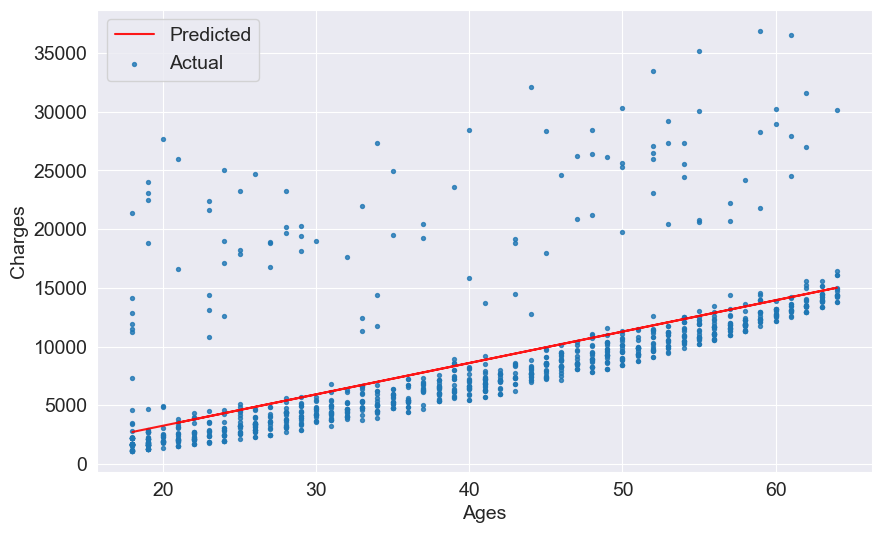

In [52]:
try_parameters(model.coef_, model.intercept_)

In [53]:
# To use the gradient decent model you would need to use the SGDRegressor class from scikit-learn to train a model using the stochastic gradient descent technique. Make predictions and compute the loss.
# See if you see a difference the in the results.

In [54]:
from sklearn.linear_model import SGDRegressor  # this class will use the Stochastic gradient descent technique.
models2 = SGDRegressor()

In [55]:
input2 = non_smoker_df[['age']]
print(f"input2.shape: {input2.shape}")
print(f"target.shape: {target.shape}")


input2.shape: (1064, 1)
target.shape: (1064,)


In [85]:
## Exercise: Repeat the steps in this section to train a linear regression model to estimate medical charges for smokers. Visualize the targest and predictions, and compute the loss.
# Make a new data frame for smokers

smoker_df = medical_df[medical_df.smoker == "yes"]

In [57]:
model  #LinearRegression model
models2  # SGDRegressor model


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,None


In [58]:
new_inputs = smoker_df[['age']]
new_target = smoker_df.charges
print(f"new_inputs.shape: {new_inputs.shape}")
print(f"targets.shapes: {new_target.shape}")

new_inputs.shape: (274, 1)
targets.shapes: (274,)


In [59]:
model.fit(new_inputs, new_target)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [60]:
model.predict(np.array([[37],
              [41],
              [27]]))

c:\Users\mlee\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([31587.91940498, 32808.86981342, 28535.54338388])

In [61]:
new_predictions = model.predict(new_inputs)
new_predictions

array([26093.642567  , 39218.85945773, 28535.54338388, 29451.25619021,
       30672.20659865, 29756.49379232, 27009.35537333, 28840.78098599,
       30977.44420076, 38608.38425351, 31282.68180287, 34945.53302819,
       31282.68180287, 37997.90904929, 25788.40496489, 36471.72103874,
       26398.88016911, 28840.78098599, 28535.54338388, 27009.35537333,
       31587.91940498, 34029.82022186, 37692.67144718, 38303.1466514 ,
       39829.33466195, 37387.43384507, 31893.15700709, 38913.62185562,
       26398.88016911, 39524.09705984, 29146.0185881 , 33724.58261975,
       26093.642567  , 30061.73139443, 30672.20659865, 29451.25619021,
       34335.05782397, 33114.10741553, 34945.53302819, 25788.40496489,
       29451.25619021, 33114.10741553, 25788.40496489, 39524.09705984,
       31282.68180287, 28535.54338388, 30977.44420076, 26093.642567  ,
       33114.10741553, 32503.63221131, 26093.642567  , 27314.59297544,
       39524.09705984, 25788.40496489, 39524.09705984, 36776.95864085,
      

In [86]:
new_predictions2 = models2.predict(new_inputs)
new_predictions2

NotFittedError: This SGDRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
rmse(new_inputs, new_target)

np.float64(nan)

In [ ]:
model.coef_

np.float64(20294.12812691597)

In [ ]:
model.intercept_

np.float64(20294.12812691597)

In [ ]:
models2.coef_

array([561.87870114])

In [ ]:
models2.intercept_

array([-3861.84475175])

RMSE Loss: 24338.502872599212


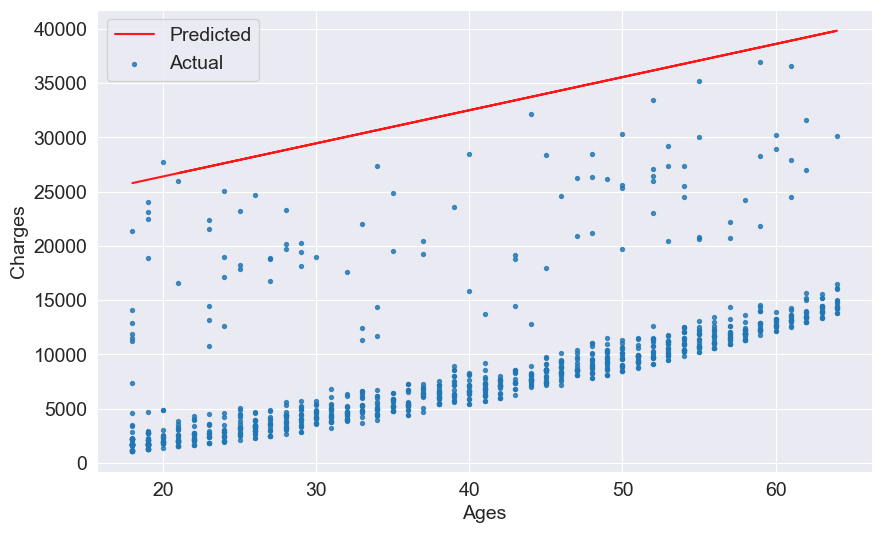

In [ ]:
try_parameters(model.coef_, model.intercept_)

RMSE Loss: 11646.514197408096


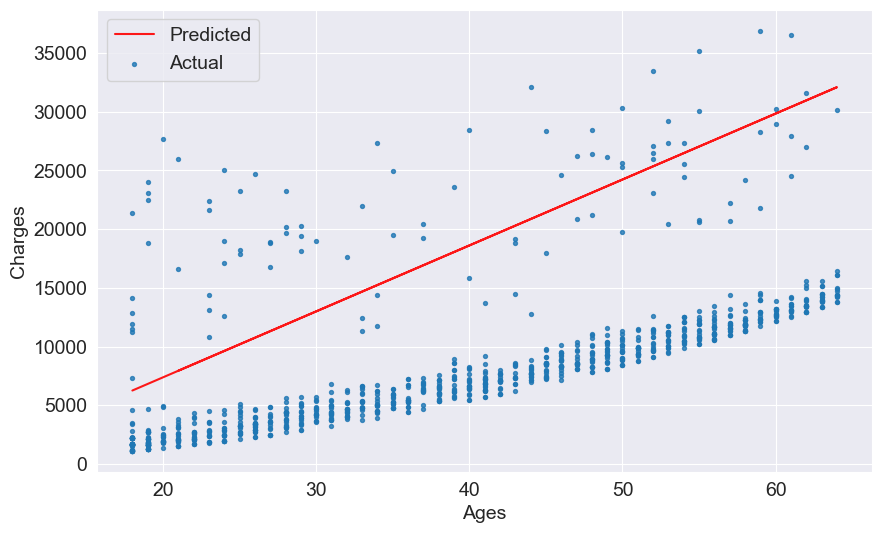

In [ ]:
try_parameters(models2.coef_, models2.intercept_)

In [65]:
# Every Machine Learning problem has 3 components:
    # Model
    # Cost Function
    # Optimizer

## As seen above, it takes just a few linkes to code to train machine learning model using scikit-learn
# Create inputs and targets
inputs, targets = non_smoker_df[['age','bmi']], non_smoker_df['charges']
# Create and train the model
model = LinearRegression().fit(inputs, targets)
# Generate predictions
predictions_ex = model.predict(inputs)
# Compute loss to evalute the model
loss = rmse(targets, predictions_ex)
print(f"Loss: {loss}")

Loss: 4662.3128354612945


In [67]:
non_smoker_df.charges.corr(non_smoker_df.bmi)

np.float64(0.08403654312833271)

In [75]:
fig = px.scatter(non_smoker_df,
                 x = 'bmi',
                 y = 'charges',
                 hover_data = 'sex',
                 opacity = 0.8,
                 title = 'BMI vs. Charges')
fig.update_layout(xaxis_title_font_textcase = 'upper',
                  yaxis_title_font_textcase = 'upper')
fig.update_traces(marker_size = 5)
fig.show()

In [77]:
model.coef_, model.intercept_

(array([266.87657817,   7.07547666]), np.float64(-2293.6320906488727))

In [83]:
inputs, targets = non_smoker_df[['age','bmi','children']], non_smoker_df['charges']

model = LinearRegression().fit(inputs, targets)

prediction = model.predict(inputs)

loss = rmse(targets, predictions)
print(f"Loss: {loss}")

Loss: 4662.505766636395


In [96]:
## Repeat the steps in this section to train a linear regression model to estimate medical charges for smokers.
## Visualize the targets and predications, and compute the loss

inputs5, targets5 = smoker_df[['age', 'bmi']], smoker_df['charges']

modelSmoker = LinearRegression().fit(inputs5, targets5)

prediction5 = modelSmoker.predict(inputs5)

loss_smoker = rmse(targets5, prediction5)
print(f"Loss: {loss_smoker}")

Loss: 5722.782238884456


In [98]:
inputs6, targets6 = smoker_df[['age','bmi', 'children']], smoker_df['charges']

model6 = LinearRegression().fit(inputs6, targets6)

prediction6 = model6.predict(inputs6)

loss6 = rmse(targets6, prediction6)
print(f"Loss6: {loss6}")

Loss6: 5718.202480524154


In [100]:
## Now run the Linear Regression model again the entire dataset whether they are smokers or non-smokers.

inputsNew, targetsNew = medical_df[['age','bmi','children']], medical_df['charges']

modelNew = LinearRegression().fit(inputsNew, targetsNew)

predictionNew = modelNew.predict(inputsNew)

lossNew = rmse(targetsNew, predictionNew)
print(f"New Loss: {lossNew}")

New Loss: 11355.317901125973


In [102]:
figure =px.scatter(medical_df,
                    x='age',
                    y='charges',
                    color='smoker',
                    opacity=.8,
                    title="age vs. charges")
figure.update_layout(xaxis_title_font_textcase = 'upper',
                     yaxis_title_font_textcase = 'upper')
figure.update_traces(marker_size = 5)
figure.show()